In [2]:
import pandas as pd
import matplotlib.pyplot as plt

## NOMOR 2

In [3]:
## Nomor 2
df = pd.read_csv("accelerometer.csv")
df.describe()

,wconfid,pctid,x,y,z
count,153000.000000,153000.000000,153000.000000,153000.000000,153000.000000
mean,2.000000,60.000000,0.995622,0.005351,-0.117769
std,0.816499,24.494977,0.773958,0.742602,0.517008
min,1.000000,20.000000,-8.000000,-8.000000,-5.867000
25%,1.000000,40.000000,0.945000,-0.078000,-0.172000
50%,2.000000,60.000000,0.992000,0.008000,-0.125000
75%,3.000000,80.000000,1.039000,0.105000,-0.066000
max,3.000000,100.000000,7.996000,7.996000,6.086000


In [4]:
df.nunique()

wconfid       3
pctid        17
x          2733
y          2653
z          1808
dtype: int64

In [5]:
df["pctid"].unique()

array([ 20,  25,  30,  35,  40,  45,  50,  55,  60,  65,  70,  75,  80,
        85,  90,  95, 100])

In [6]:
selected_pctid = 60

In [7]:
new_df = df[df["pctid"]==selected_pctid]
new_df.describe()

,wconfid,pctid,x,y,z
count,9000.000000,9000.0,9000.000000,9000.000000,9000.000000
mean,2.000000,60.0,0.992639,0.002432,-0.119657
std,0.816542,0.0,0.101870,0.267377,0.177260
min,1.000000,60.0,0.289000,-1.437000,-0.641000
25%,1.000000,60.0,0.945000,-0.090000,-0.180000
50%,2.000000,60.0,0.996000,0.004000,-0.121000
75%,3.000000,60.0,1.043000,0.129000,-0.039000
max,3.000000,60.0,1.363000,0.883000,0.441000


In [8]:
new_df.index

Index([ 24000,  24001,  24002,  24003,  24004,  24005,  24006,  24007,  24008,
        24009,
       ...
       128990, 128991, 128992, 128993, 128994, 128995, 128996, 128997, 128998,
       128999],
      dtype='int64', length=9000)

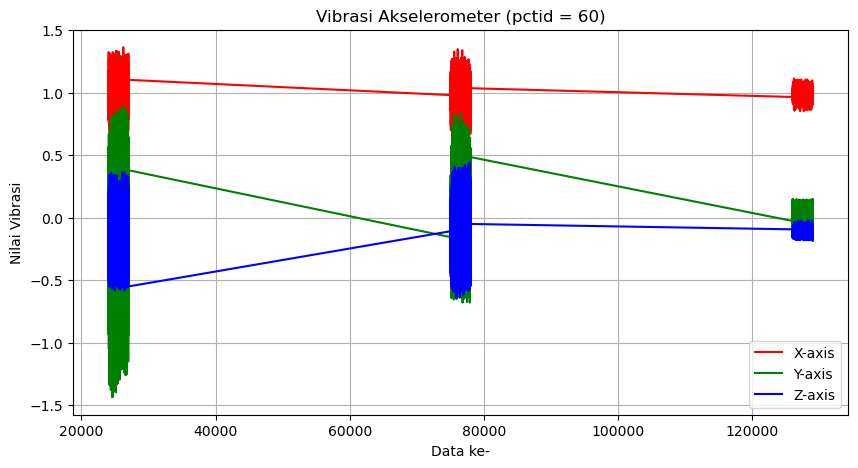

In [9]:
plt.figure(figsize=(10, 5))
plt.plot(new_df.index, new_df["x"], label="X-axis", color="red")
plt.plot(new_df.index, new_df["y"], label="Y-axis", color="green")
plt.plot(new_df.index, new_df["z"], label="Z-axis", color="blue")

plt.title(f"Vibrasi Akselerometer (pctid = {selected_pctid})")
plt.xlabel("Data ke-")
plt.ylabel("Nilai Vibrasi")
plt.legend()
plt.grid(True)

plt.show()

## NOMOR 3
#### Visualisasi data random

In [10]:
from numpy import random as rnd


In [11]:
var = rnd.randint(0,1000,size=(100,5))
output = rnd.randint(0,2,size=(100,1))

var_name = ["var1",'var2', 'var3','var4','var5']
output_name = ["output"]


In [12]:
var_df = pd.DataFrame(var,columns=var_name)
var_df["output"] = output

var_df.head()

,var1,var2,var3,var4,var5,output
0,565,571,392,795,606,0
1,409,513,548,942,883,0
2,180,857,487,623,321,1
3,781,744,615,437,766,0
4,867,215,673,3,223,1


Text(0.5, 1.0, 'Correlation Heatmap')

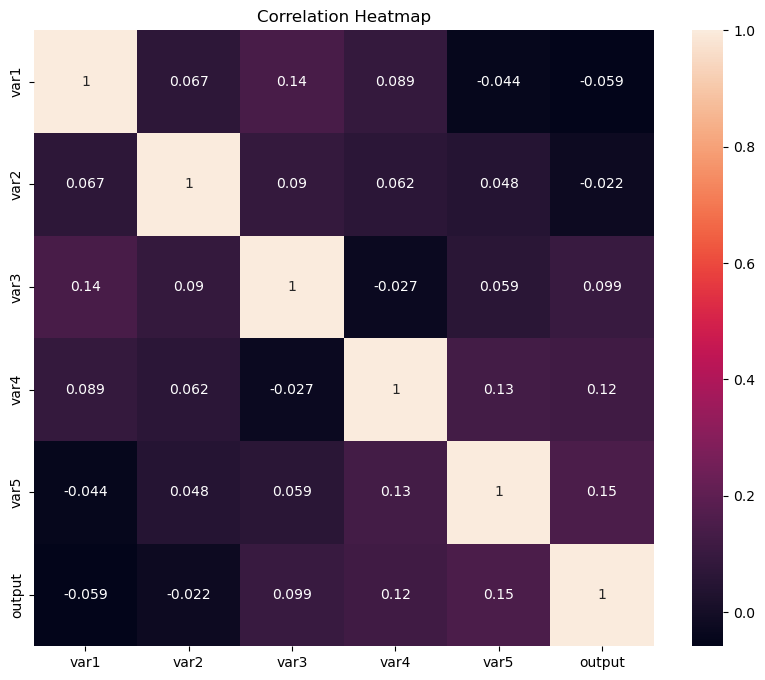

In [13]:
import seaborn as sns

correlation = var_df.corr()

plt.figure(figsize=(10,8))
sns.heatmap(correlation, annot=True, cmap='rocket')
plt.title("Correlation Heatmap")

Text(0.5, 1.0, 'boxplot var1 - 5')

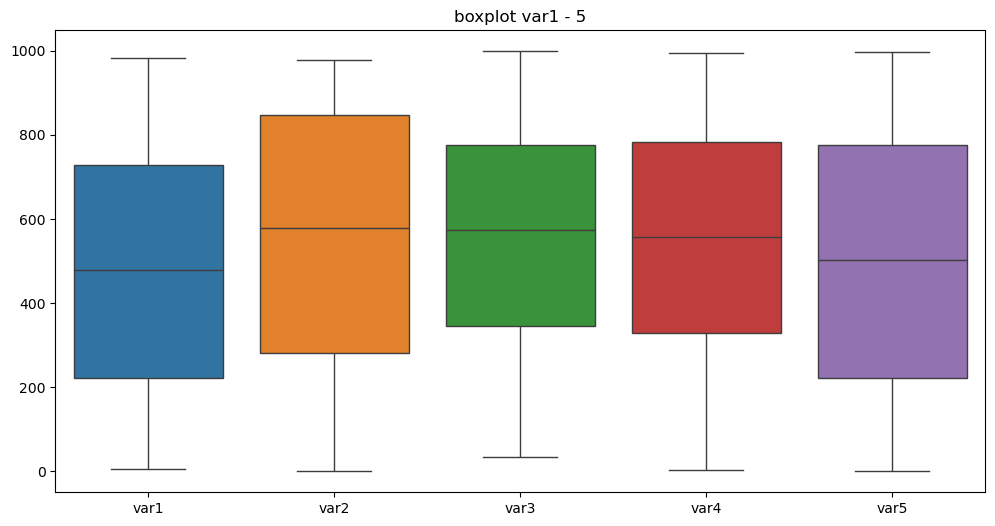

In [14]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=var_df.drop('output', axis=1))
plt.title("boxplot var1 - 5")

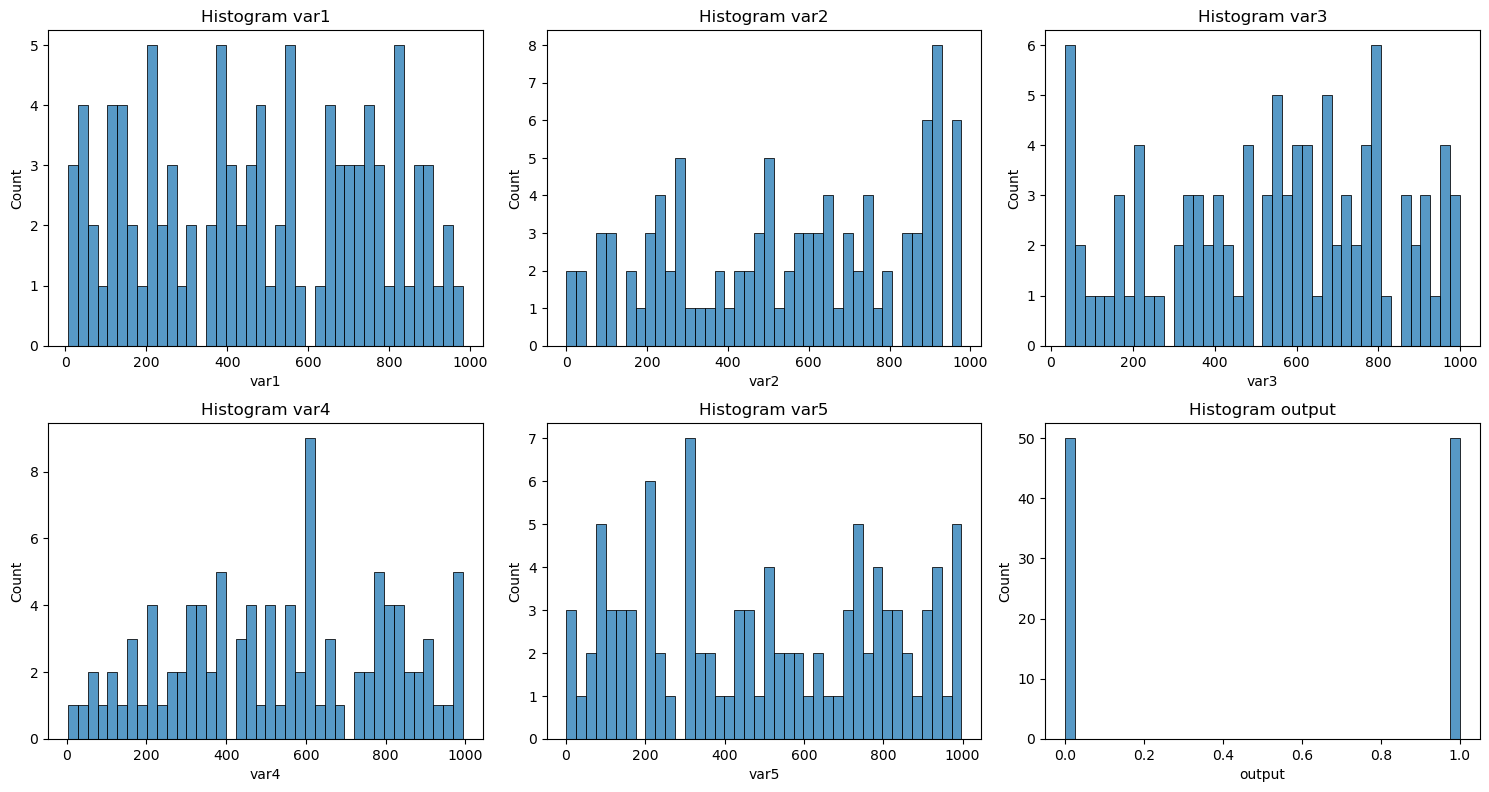

In [15]:
fig, axes = plt.subplots(2, 3, figsize=(15, 8))
axes = axes.ravel()

for idx, col in enumerate(var_df.columns):
    sns.histplot(data=var_df, x=col, ax=axes[idx], bins=40)
    axes[idx].set_title(f'Histogram {col}')

plt.tight_layout(pad=1)
plt.show()

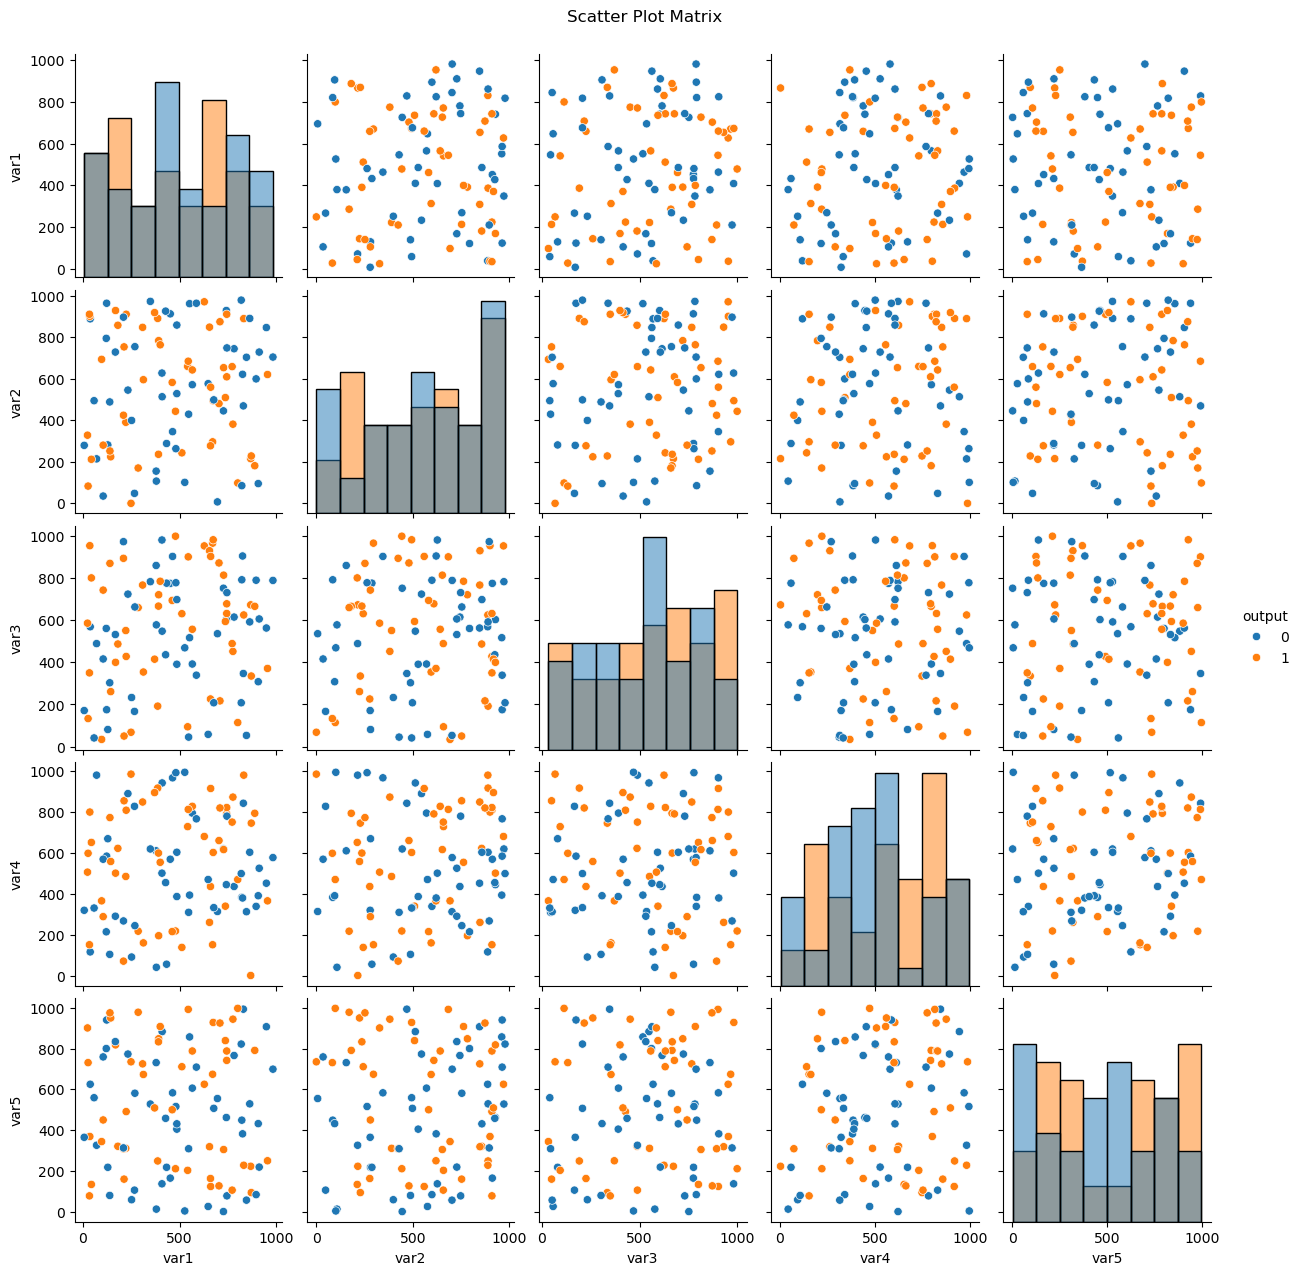

In [16]:
sns.pairplot(var_df, hue='output', diag_kind='hist')
plt.suptitle('Scatter Plot Matrix', y=1.02)
plt.show()